### **Babariya Jasmin**



### **Reg.no:-daiict19001**

**Onion Market Analysis in India**

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Onion Area of Sowing, Productio and yield per Ha**

In [51]:
df=pd.read_csv("/content/drive/MyDrive/IIRS/module_1/Onion_Market_Analysis_Project/Onion_project_Data/Main_Data/Onion 2011 to 2020 Area_of_sowing and Production/ONION__AraeOfSowing_Production_Yield - ONION_MAIN.csv.csv")
df

,State,District,Year,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
0,Andhra Pradesh,ADILABAD,2011-12,Rabi,360.00,9830.00,27.31
1,Andhra Pradesh,ANANTAPUR,2011-12,Kharif,2757.00,39563.00,14.35
2,Andhra Pradesh,ANANTAPUR,2011-12,Rabi,208.00,4259.00,20.48
3,Andhra Pradesh,ANANTAPUR,2012-13,Kharif,2000.00,25000.00,12.50
4,Andhra Pradesh,ANANTAPUR,2013-14,Kharif,1414.00,31097.00,21.99
...,...,...,...,...,...,...,...
2691,Rajeshthan,Rajeshthan,2020-21,kharif,82.30,1386.00,18.57
2692,Andhra Pradesh,Andhra Pradesh,2020-21,kharif,40.88,636.49,17.16
2693,West Bangal,West Bangal,2020-21,kharif,40.61,747.60,20.29
2694,Haryana,Haryana,2020-21,kharif,23.71,602.35,28.00


**feature engineering**

In [52]:
column_name = "Season"                          # column name
target_Season = ["Kharif","kharif"]                       # Give Specific Seeason of the year


In [53]:
filtered_df = df[df[column_name].str.contains('|'.join(target_Season))]
filtered_df
                                          # Make a new Dataframe for ony KHARIF season all States

,State,District,Year,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
1,Andhra Pradesh,ANANTAPUR,2011-12,Kharif,2757.00,39563.00,14.35
3,Andhra Pradesh,ANANTAPUR,2012-13,Kharif,2000.00,25000.00,12.50
4,Andhra Pradesh,ANANTAPUR,2013-14,Kharif,1414.00,31097.00,21.99
6,Andhra Pradesh,ANANTAPUR,2014-15,Kharif,1969.00,35214.00,17.88
8,Andhra Pradesh,ANANTAPUR,2015-16,Kharif,2286.00,48603.00,21.26
...,...,...,...,...,...,...,...
2691,Rajeshthan,Rajeshthan,2020-21,kharif,82.30,1386.00,18.57
2692,Andhra Pradesh,Andhra Pradesh,2020-21,kharif,40.88,636.49,17.16
2693,West Bangal,West Bangal,2020-21,kharif,40.61,747.60,20.29
2694,Haryana,Haryana,2020-21,kharif,23.71,602.35,28.00


In [54]:
filtered_df = filtered_df[filtered_df["Yield (Tonnes/Hectare)"] != 2610.67]
filtered_df = filtered_df[filtered_df["Yield (Tonnes/Hectare)"] != 4070]
filtered_df = filtered_df[filtered_df["Yield (Tonnes/Hectare)"] != 0]    #Remove Uncertain number

In [55]:
odf_l = list(filtered_df.columns)[4:]
s_odf = {}
for col in odf_l:
    s_odf[col] = [sum(filtered_df[col])]
print(s_odf)

s_odf = pd.DataFrame(s_odf)                        #Sum of all Columns

{'Area (Hectare)': [1666351.53], 'Production (Tonnes)': [14976650.000000002], 'Yield (Tonnes/Hectare)': [6848.239999999998]}


In [56]:
sum_yearwise = filtered_df.groupby('Year').sum()
sum_yearwise                                         #Sum of columns Year wise

<ipython-input-56-33f747d33c56>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_yearwise = filtered_df.groupby('Year').sum()


,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
Year,,,
2011-12,176299.00,1229009.0,370.75
2012-13,92827.00,809703.0,249.71
2013-14,146771.00,1321180.0,801.91
2014-15,212496.00,1577554.0,663.78
2015-16,228701.00,1559788.0,639.61
2016-17,234842.00,2104769.0,976.68
2017-18,145600.00,2096900.0,963.39
2018-19,234541.00,2303149.0,801.50
2019-20,192813.00,1935082.0,1170.69


In [57]:
new_df = pd.DataFrame(sum_yearwise).reset_index()
new_df                                                  #Make A new DataFrame Year wise.

,Year,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
0,2011-12,176299.00,1229009.0,370.75
1,2012-13,92827.00,809703.0,249.71
2,2013-14,146771.00,1321180.0,801.91
3,2014-15,212496.00,1577554.0,663.78
4,2015-16,228701.00,1559788.0,639.61
5,2016-17,234842.00,2104769.0,976.68
6,2017-18,145600.00,2096900.0,963.39
7,2018-19,234541.00,2303149.0,801.50
8,2019-20,192813.00,1935082.0,1170.69
9,2020-21,1461.53,39516.0,210.22


In [58]:
filtered_df.describe()            #Find Statistic

,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
count,626.000000,626.000000,626.000000
mean,2661.903403,23924.361022,10.939681
std,6525.147976,66221.351076,6.266065
min,1.000000,1.000000,0.170000
25%,25.000000,227.500000,6.610000
50%,194.500000,1877.500000,9.670000
75%,1441.250000,13756.000000,14.410000
max,43527.000000,582186.000000,44.070000


In [59]:
New_csv=filtered_df.to_csv("New_Kharif season_data.csv", index=False)
New_csv                                   #  Make a new csv file for KHARIF season

In [60]:
new=pd.read_csv("New_Kharif season_data.csv")

univariate analysis plots

**QUESTION:--1 Did the yield of onion vary in the last decade, and if so, how did it fluctuate?**

<Axes: ylabel='Yield (Tonnes/Hectare)'>

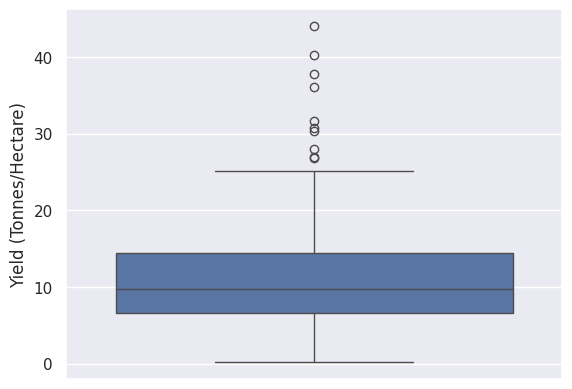

In [61]:
sns.boxplot(new["Yield (Tonnes/Hectare)"])

**QUESTION:--2  How has the onion yield fluctuated year-wise from 2011 to 2020?**

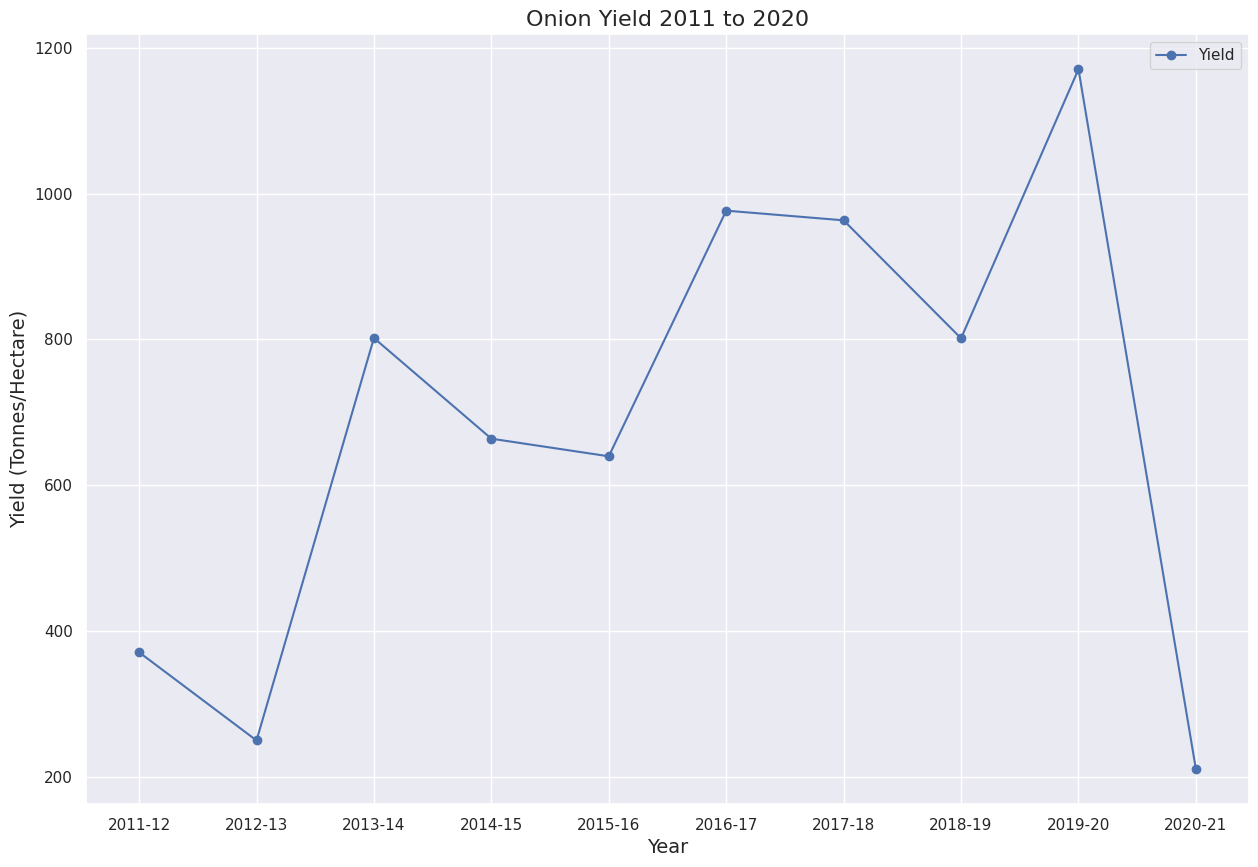

In [62]:
plt.figure(figsize=(15, 10))

plt.plot(new_df['Year'], new_df['Yield (Tonnes/Hectare)'], marker='o', label='Yield')     #plot line graph yield of Onion time series
plt.xlabel('Year', fontsize=14)
plt.ylabel('Yield (Tonnes/Hectare)', fontsize=14)
plt.title('Onion Yield 2011 to 2020', fontsize=16)
plt.legend()

plt.show()

Multivariate analysis plots

**QUESTION:--3 Did the area of onion sowing and its production vary over the last decade?**

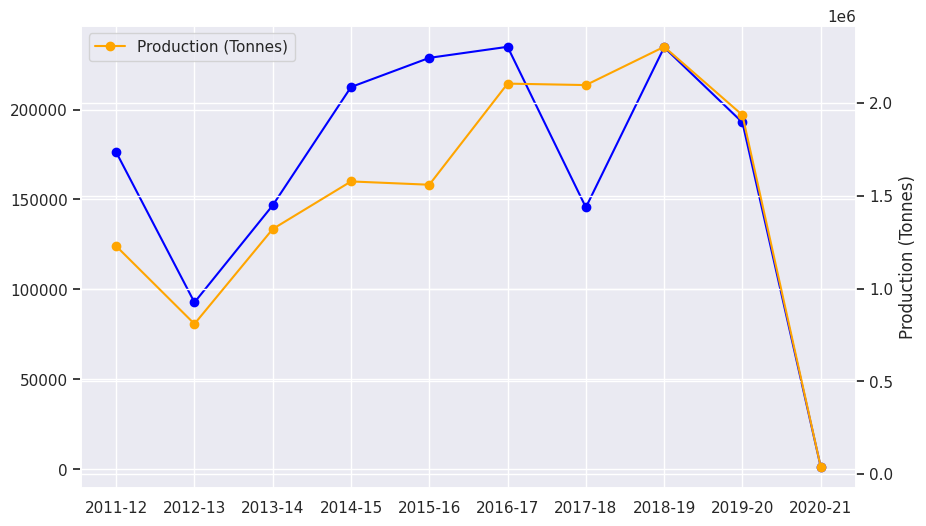

In [63]:
plt.figure(figsize=(10, 6))

plt.plot(new_df['Year'], new_df['Area (Hectare)'], label='Area (Hectare)', marker='o', color='blue')      #Draw area of onion sowing and its production vary over the last decade

ax2 = plt.gca().twinx()
ax2.plot(new_df['Year'], new_df['Production (Tonnes)'], label='Production (Tonnes)', marker='o', color='orange')

plt.xlabel('Year')
plt.ylabel('Area (Hectare)')
ax2.set_ylabel('Production (Tonnes)')

plt.legend(loc='upper left')
ax2.legend(loc='upper left')
plt.xticks(rotation='vertical')

plt.show()


**QUESTION:--4 Did the area of onion sowing and its production change state-wise in India?**

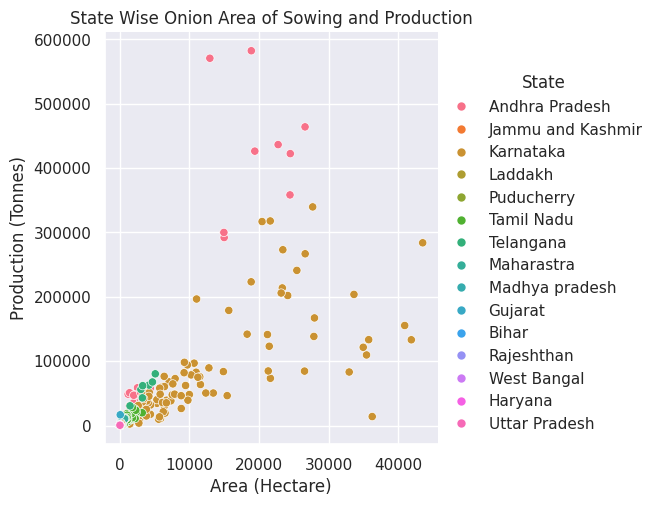

In [64]:
sns.set_theme()

sns.relplot(data=new, x="Area (Hectare)", y="Production (Tonnes)",hue="State")
plt.title("State Wise Onion Area of Sowing and Production")
plt.show()                                       # State Wise Onion Area of Sowing and Production


**QUESTION:--5  Did the area of onion sowing and its production change both state-wise and year-wise in India?**

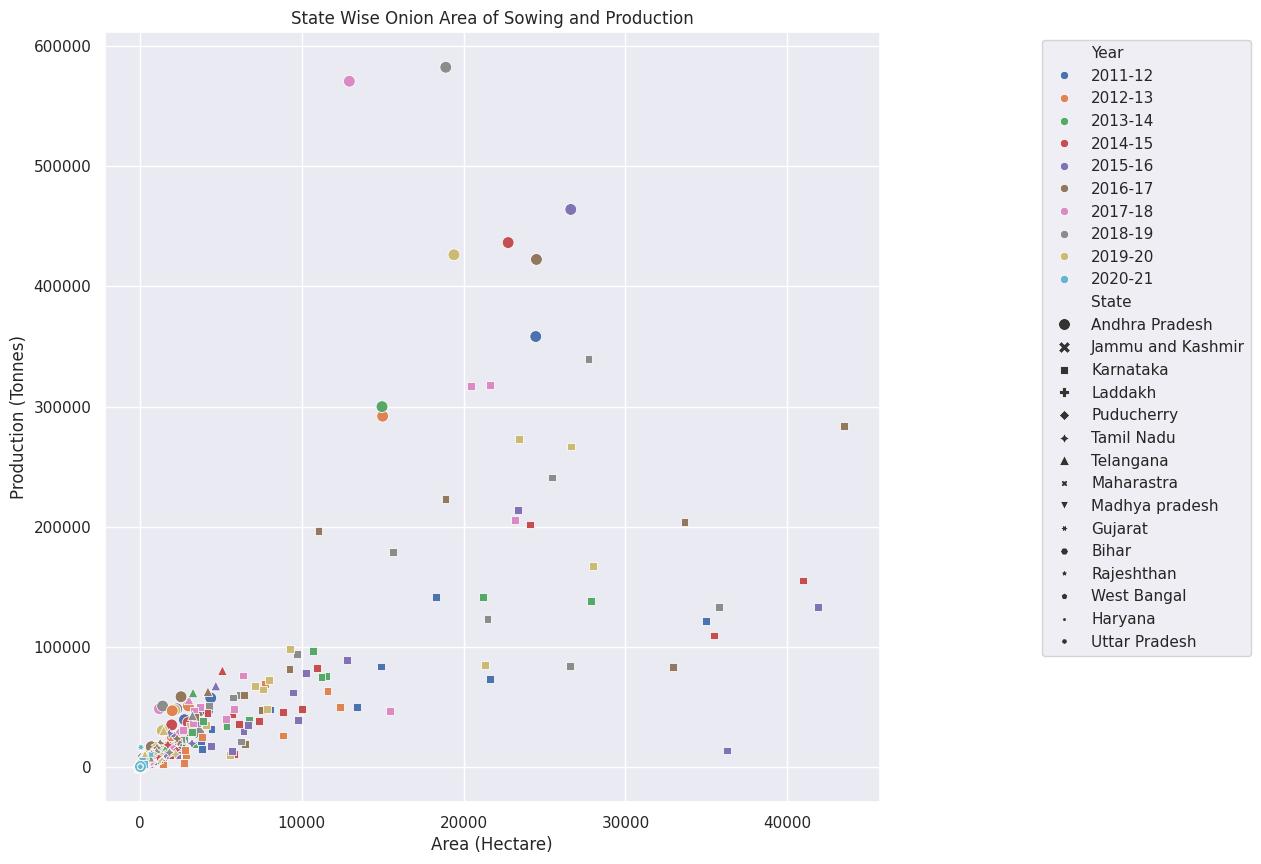

In [65]:
plt.figure(figsize=(10,10))                        #State Wise Onion Area of Sowing and Production
a=sns.scatterplot(x="Area (Hectare)", y="Production (Tonnes)", data=new, hue=new["Year"],style=new["State"],size=new["State"])
a.legend(bbox_to_anchor= (1.2,1))
plt.title("State Wise Onion Area of Sowing and Production")
plt.show()

Pairplot--give more than one relationship each other by Scaterplot. (Numerical-Numerical)

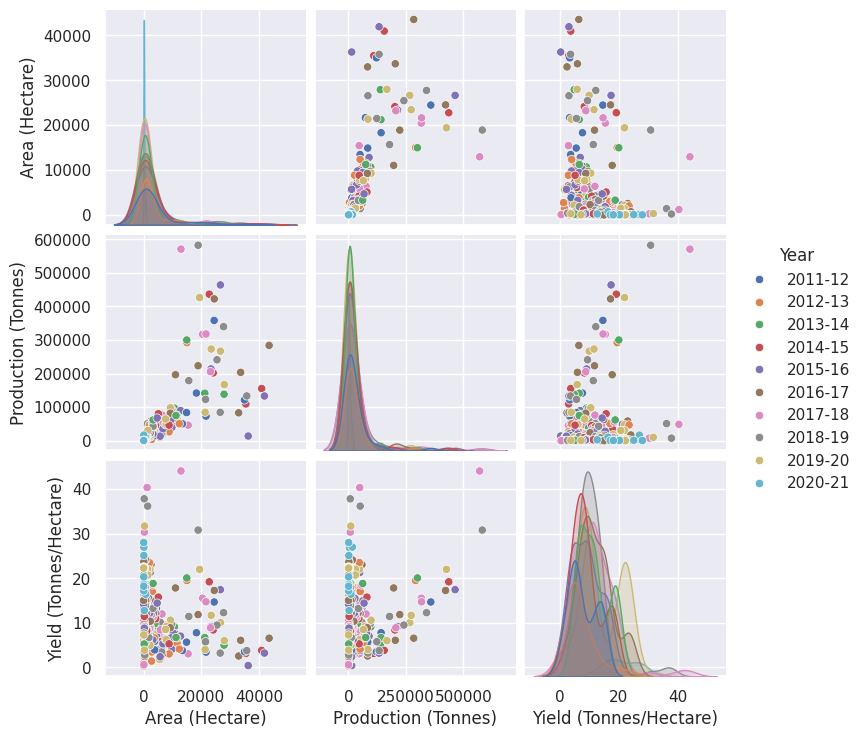

In [66]:
sns.pairplot(new,hue="Year")
# plt.title("State Wise Onion Area of Sowing, Production and Yield per Ha.")
plt.show()

### **2011 To 2023 between onion Market Arrivel APMC Wise and its Percentage**

In [67]:
market_arri=pd.read_csv("/content/drive/MyDrive/IIRS/module_1/Onion_Market_Analysis_Project/Onion_project_Data/Main_Data/2011_to_2023_onion_MARKET_Arrivel_and_it_precentage/2022 and 2023 Market_Arrivel_and_its_Percentage.csv")
market_arri.head(30)

,State,District,Market,Market Arrivals (2023),Market Arrivals (2022),% (+/-) WRT(previous year),Market%
0,Andaman and Nicobar,Nicobar,Car Nicobar,8.34,7.17,16.32%,6.30%
1,Andaman and Nicobar,North and Middle Andaman,Diglipur,25.22,24.92,1.20%,19.04%
2,Andaman and Nicobar,South Andaman,Port Blair,98.92,98.92,0%,74.67%
3,Andhra Pradesh,Anantapur,Guntakal,10.00,10.00,0%,0.00%
4,Andhra Pradesh,Anantapur,Rayadurg,52.00,52.00,0%,0.01%
5,Andhra Pradesh,Chittor,Chittor(Rythu Bazar),976.90,976.90,0%,0.09%
6,Andhra Pradesh,Chittor,Tirupati,13.72,13.72,0%,0.00%
7,Andhra Pradesh,Cuddapah,Cuddapah,3.00,3.00,0%,0.00%
8,Andhra Pradesh,Cuddapah,Kamalapuram,220.50,220.50,0%,0.02%
9,Andhra Pradesh,Cuddapah,Lakkireddipally,8.00,8.00,0%,0.00%


In [68]:
market_arri.shape

(1617, 7)

**Feature engineering**

In [69]:
market=market_arri["Market%"].tolist()

b=[]
for i in market:
  a=i[:-1]
  b.append(a)
print(b)                             # Convert "Market %" column into without percentege elements.



['6.30', '19.04', '74.67', '0.00', '0.01', '0.09', '0.00', '0.00', '0.02', '0.00', '0.05', '0', '0.00', '0', '0.12', '0.03', '0.04', '0.02', '0', '1.56', '0.26', '0.20', '0.04', '68.81', '0.00', '1.55', '0.00', '0.05', '0.05', '0.00', '0.00', '0.00', '0.01', '0.00', '0', '0.05', '0.00', '0.06', '0.01', '0.15', '26.80', '3.78', '36.82', '59.01', '0.39', '11.52', '0.79', '15.32', '2.97', '0.24', '0.15', '2.81', '1.88', '0.23', '1.54', '1.05', '19.03', '0.59', '17.70', '7.83', '0.82', '0.93', '0.18', '0.01', '6.37', '3.09', '1.46', '0.42', '1.89', '1.18', '0.85', '5.44', '0.33', '0.29', '0.58', '0.15', '0.03', '0.06', '0.11', '0.06', '1.08', '0.12', '0.11', '0.54', '1.22', '0.18', '0.14', '0.04', '0.24', '0.11', '0.30', '0.16', '2.90', '0.05', '0.05', '0.09', '1.63', '1.61', '0.55', '4.36', '1.20', '1.34', '0.58', '0.13', '2.14', '0.24', '0.32', '0.00', '0.12', '0.13', '0.31', '0.03', '0.06', '0.31', '0.68', '0.50', '1.66', '0.22', '0.16', '0.80', '0.13', '0.14', '0.27', '0.07', '1.01', '

In [70]:
new_market_arri1 = pd.DataFrame(b, columns=["Market_cover_state_wise"])
new_market_arri1                     #Make a new Dataframe of Market_cover_state_wise without percentage

,Market_cover_state_wise
0,6.30
1,19.04
2,74.67
3,0.00
4,0.01
...,...
1612,1.87
1613,1.17
1614,0.21
1615,0


In [71]:
market=market_arri["% (+/-) WRT(previous year)"].tolist()

d=[]
for i in market:
  e=i[:-1]
  d.append(e)
print(d)                                             # Convert "% (+/-) WRT(previous year)" column into without percentege elements


['16.32', '1.20', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-62.14', '-52.04', '0', '0', '0', '-0.20', '0', '-23.90', '0', '-30.74', '0', '0.42', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '-32.63', '-0.04', '0', '0', '0', '0', '-1.02', '-2.49', '-5.01', '-29.82', '-45.81', '-0.54', '-3.56', '-0.06', '-10.04', '-30.61', '-53.95', '-2.85', '0', '-4.82', '4.25', '0', '0', '0', '0', '-0.27', '-16.17', '-13.91', '0', '0', '-3.36', '98.26', '84.35', '67.49', '111.11', '107.15', '33.32', '108.21', '46.37', '268.71', '0', '68.79', '49.66', '19.50', '51.62', '210.00', '80.00', '579.67', '0', '101.82', '78.04', '79.40', '234.59', '123.68', '211.80', '0', '461.33', '73.51', '121.55', '94.16', '109.30', '89.39', '102.28', '44.23', '0', '57.26', '91.89', '133.18', '0', '26.36', '155.77', '0', '0', '43.42', '91.29', '54.11', '56.67', '40.47', '20.07', '88.32', '20.38', '19.75', '19.16', '118.56', '443.09', '44.93', '49.63', '84.05', '89.57', '143.54', '1829.

In [72]:
new_market_arri2 = pd.DataFrame(d, columns=[" (+/-) WRT(previous year)_Without_percentage"])
new_market_arri2                     #Make a new Dataframe of Market_cover_state_wise without percentage

,(+/-) WRT(previous year)_Without_percentage
0,16.32
1,1.20
2,0
3,0
4,0
...,...
1612,5.04
1613,-5.34
1614,10.37
1615,0


In [73]:
new_market_arri=market_arri.iloc[:,:5]
new_market_arri                                               #new dataframe only market Arrivel2022/23

,State,District,Market,Market Arrivals (2023),Market Arrivals (2022)
0,Andaman and Nicobar,Nicobar,Car Nicobar,8.34,7.17
1,Andaman and Nicobar,North and Middle Andaman,Diglipur,25.22,24.92
2,Andaman and Nicobar,South Andaman,Port Blair,98.92,98.92
3,Andhra Pradesh,Anantapur,Guntakal,10.00,10.00
4,Andhra Pradesh,Anantapur,Rayadurg,52.00,52.00
...,...,...,...,...,...
1612,West Bangal,Puruliya,Purulia,55254.10,52601.40
1613,West Bangal,Sounth 24 Parganas,Baruipur(Canning),34632.15,36584.15
1614,West Bangal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),6233.10,5647.30
1615,West Bangal,Uttar Dinajpur,Islampur,0.00,325.00


In [74]:
df_concat = pd.concat([new_market_arri,new_market_arri1,new_market_arri2], ignore_index=False,axis=1)
df_concat                                                                        #join all the column in one Dataframe

,State,District,Market,Market Arrivals (2023),Market Arrivals (2022),Market_cover_state_wise,(+/-) WRT(previous year)_Without_percentage
0,Andaman and Nicobar,Nicobar,Car Nicobar,8.34,7.17,6.30,16.32
1,Andaman and Nicobar,North and Middle Andaman,Diglipur,25.22,24.92,19.04,1.20
2,Andaman and Nicobar,South Andaman,Port Blair,98.92,98.92,74.67,0
3,Andhra Pradesh,Anantapur,Guntakal,10.00,10.00,0.00,0
4,Andhra Pradesh,Anantapur,Rayadurg,52.00,52.00,0.01,0
...,...,...,...,...,...,...,...
1612,West Bangal,Puruliya,Purulia,55254.10,52601.40,1.87,5.04
1613,West Bangal,Sounth 24 Parganas,Baruipur(Canning),34632.15,36584.15,1.17,-5.34
1614,West Bangal,Sounth 24 Parganas,Diamond Harbour(South 24-pgs),6233.10,5647.30,0.21,10.37
1615,West Bangal,Uttar Dinajpur,Islampur,0.00,325.00,0,0


In [75]:
sum_Statewise = new_market_arri.groupby('State').sum()
sum_Statewise                                          # sum of Market Arrivel State wise

<ipython-input-75-0f74be482de1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_Statewise = new_market_arri.groupby('State').sum()


,Market Arrivals (2023),Market Arrivals (2022)
State,,
Andaman and Nicobar,132.48,131.01
Andhra Pradesh,1029765.35,1350560.49
Arunachal Pradesh,1270.55,1270.55
Assam,337921.30,359804.70
Bihar,540072.03,301902.72
Chandigarh,352271.90,423122.26
Chhattisgarh,319972.40,264949.90
Delhi,5641091.61,5629886.23
Goa,743553.86,743090.18


**Multivariate Data Analysis**

**QUESTION:--6  How can the market arrivals of onions in 2022 and 2023 be analysed, and what insights can be gained from their trends?**

In [76]:
new_df = pd.DataFrame(sum_Statewise).reset_index()
new_df

,State,Market Arrivals (2023),Market Arrivals (2022)
0,Andaman and Nicobar,132.48,131.01
1,Andhra Pradesh,1029765.35,1350560.49
2,Arunachal Pradesh,1270.55,1270.55
3,Assam,337921.30,359804.70
4,Bihar,540072.03,301902.72
5,Chandigarh,352271.90,423122.26
6,Chhattisgarh,319972.40,264949.90
7,Delhi,5641091.61,5629886.23
8,Goa,743553.86,743090.18
9,Gujarat,15903155.33,15251895.10


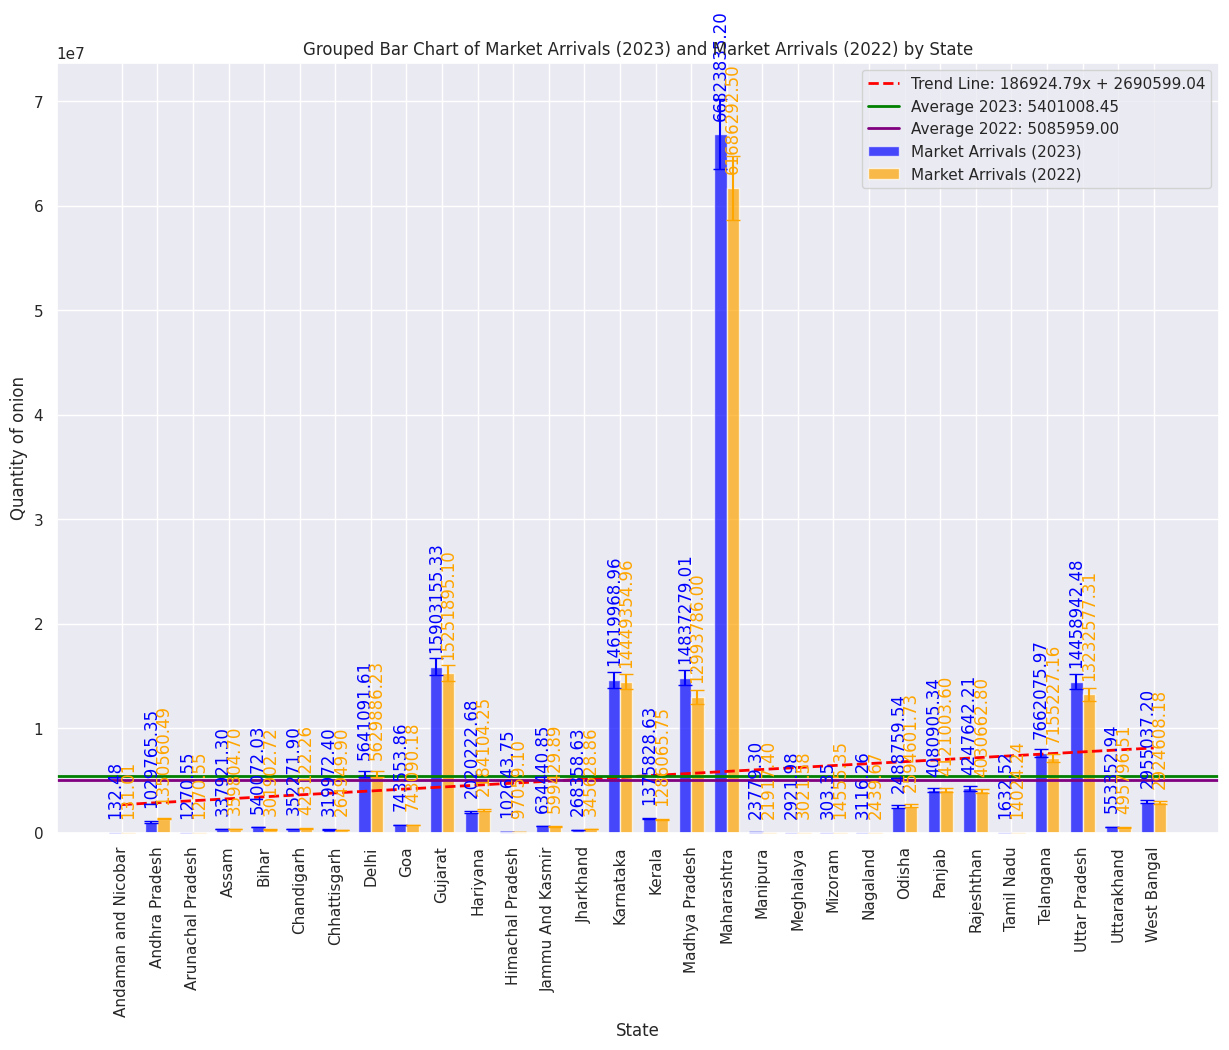

In [77]:
plt.figure(figsize=(15, 10))
bar_width = 0.35

index = np.arange(len(new_df['State']))              # Generate index for each bar

# Bar plots
bar1 = plt.bar(index - bar_width/2, new_df['Market Arrivals (2023)'], bar_width, label='Market Arrivals (2023)', color='blue', alpha=0.7)
bar2 = plt.bar(index + bar_width/2, new_df['Market Arrivals (2022)'], bar_width, label='Market Arrivals (2022)', color='orange', alpha=0.7)

# Calculate max value for labeling
max_value = max(new_df['Market Arrivals (2023)'].max(), new_df['Market Arrivals (2022)'].max())

# Data labels on top of each bar
for i, value in enumerate(new_df['Market Arrivals (2023)']):
    plt.text(index[i] - bar_width/2, value + 0.02 * max_value, f'{value:.2f}', ha='center', va='bottom', rotation=90, color='blue')

for i, value in enumerate(new_df['Market Arrivals (2022)']):
    plt.text(index[i] + bar_width/2, value + 0.02 * max_value, f'{value:.2f}', ha='center', va='bottom', rotation=90, color='orange')

trend_line_values = np.polyfit(index, new_df['Market Arrivals (2023)'], 1)              # Trend line
trend_line = np.poly1d(trend_line_values)
plt.plot(index, trend_line(index), color='red', linestyle='--', label=f'Trend Line: {trend_line_values[0]:.2f}x + {trend_line_values[1]:.2f}', linewidth=2)

average_2023 = np.mean(new_df['Market Arrivals (2023)'])              # Average lines
average_2022 = np.mean(new_df['Market Arrivals (2022)'])
plt.axhline(y=average_2023, color='green', linestyle='-', label=f'Average 2023: {average_2023:.2f}', linewidth=2)
plt.axhline(y=average_2022, color='purple', linestyle='-', label=f'Average 2022: {average_2022:.2f}', linewidth=2)

plt.xlabel('State')                                       # Adding labels and title
plt.ylabel('Quantity of onion')
plt.title('Grouped Bar Chart of Market Arrivals (2023) and Market Arrivals (2022) by State')

plt.legend()

plt.xticks(index, new_df['State'])               # Set x-axis ticks and labels
plt.xticks(rotation='vertical')

# Adding error bars for more information
plt.errorbar(index - bar_width/2, new_df['Market Arrivals (2023)'], yerr=new_df['Market Arrivals (2023)'] * 0.05, fmt='none', ecolor='blue', capsize=5, label='Error 2023')
plt.errorbar(index + bar_width/2, new_df['Market Arrivals (2022)'], yerr=new_df['Market Arrivals (2022)'] * 0.05, fmt='none', ecolor='orange', capsize=5, label='Error 2022')

plt.show()


## **2011 to 2023 State wise Wholesale Prices Monthly Analysis**

In [78]:
wholesale_price=pd.read_csv("/content/drive/MyDrive/IIRS/module_1/Onion_Market_Analysis_Project/Onion_project_Data/Main_Data/2011 to 2023 State wise Wholesale Prices Monthly Analysis/2011 to 2023 State wise Wholesale Prices Monthly Analysis_ -.csv")
wholesale_price

,State,"Prices January, 2011","Prices Febraury, 2011","Prices March, 2011","Prices April, 2011","Prices May, 2011","Prices June, 2011","Prices August, 2011","Prices September, 2011","Prices October, 2011",...,"Prices April, 2023","Prices May, 2023","Prices June, 2023","Prices July, 2023","Prices August, 2023","Prices September, 2023","Prices October, 2023","Prices November, 2023","Prices December, 2023","Prices January, 2024"
0,Andhra Pradesh,2297,912,546,475,442,705,1036,883,764,...,644,726,1462,1145,2060,1892,2689,3353,2399,1399
1,Assam,4185,1935,1039,890,939,993,1521,1762,1617,...,1400,1864,1989,2413,2134,1263,1689,2353,4593,2109
2,Goa,2600,1049,626,616,619,600,853,996,954,...,1128,1138,1180,1243,1192,1860,1805,3091,2324,1506
3,Gujarat,1929,839,559,418,433,541,924,1164,881,...,766,895,1074,1344,1707,1776,2667,3295,1869,1442
4,Haryana,2584,1250,731,541,478,495,1037,1517,1129,...,896,848,981,1418,1623,2726,2178,3070,2279,1733
5,Himachal Pradesh,3381,1534,943,782,687,704,1316,1659,1370,...,1550,1550,1653,2193,2568,2677,3457,4508,3435,2835
6,Jammu and Kashmir,3133,1460,848,755,713,694,1278,1417,1800,...,1306,1288,1437,1913,2430,2145,3354,4478,3511,2681
7,Jharkhand,3414,1445,911,725,738,785,1205,1105,1419,...,1123,841,1105,1356,1768,1981,2234,2146,2743,5609
8,Karnataka,2389,1092,653,621,587,756,1073,1828,990,...,907,5348,2994,1154,3492,3673,2848,3353,2558,1730
9,Kerala,4463,2049,1324,1227,1364,1701,1729,757,1702,...,2504,589,710,3077,1356,1469,4998,6229,5116,3558


**QUESTION:--7  How has the onion price fluctuated state-wise in the last 13 year in December months?**

**feature engineering**

In [79]:
december_columns = [col for col in wholesale_price.columns if 'December' in col]

december_columns.append('Prices December, 2023')

df_december = wholesale_price[['State'] + december_columns]                           # Creating a new dataframe with only December columns
print(df_december)


                State  Prices December, 2011  Prices December, 2012  \
0      Andhra Pradesh                    470                    848   
1               Assam                   1263                   1823   
2                 Goa                    878                   1254   
3             Gujarat                    638                   1107   
4             Haryana                    634                   1092   
5    Himachal Pradesh                    880                   1447   
6   Jammu and Kashmir                    889                   1309   
7           Jharkhand                    973                   1564   
8           Karnataka                    745                   1295   
9              Kerala                   1483                   1994   
10     Madhya Pradesh                    500                    921   
11        Maharashtra                    605                   1130   
12            Manipur                    788                   2000   
13    

In [80]:
new_df3 = pd.DataFrame(df_december).reset_index()
new_df4 = new_df3.drop(new_df3.columns[0], axis=1)                    #Remove Extra Index Columns
df_december_ = new_df4.loc[:,~new_df4.columns.duplicated()]           #select only the columns that are not duplicates
df_december_

,State,"Prices December, 2011","Prices December, 2012","Prices December, 2013","Prices December, 2014","Prices December, 2016","Prices December, 2017","Prices December, 2018","Prices December, 2019","Prices December, 2020","Prices December, 2021","Prices December, 2022","Prices December, 2023"
0,Andhra Pradesh,470,848,1802,1161,413,2912,457,4321,2500,1295,1058,2399
1,Assam,1263,1823,2593,2456,1491,4470,1502,5716,2367,2805,1730,4593
2,Goa,878,1254,2120,1976,810,3022,836,3456,2387,2280,1425,2324
3,Gujarat,638,1107,2234,1647,662,2328,671,6276,2026,1602,1140,1869
4,Haryana,634,1092,1247,1327,954,3167,997,4186,2621,1683,1359,2279
5,Himachal Pradesh,880,1447,1598,1497,1270,3869,1269,8687,3263,2609,1965,3435
6,Jammu and Kashmir,889,1309,1898,1986,1245,4012,1304,5678,2924,2396,1698,3511
7,Jharkhand,973,1564,2146,1965,1324,4283,2336,5476,2476,2156,1823,2743
8,Karnataka,745,1295,2277,1901,780,2907,677,7576,5053,2089,1468,2558
9,Kerala,1483,1994,1395,1266,1684,3456,1825,11481,1848,3974,2163,5116


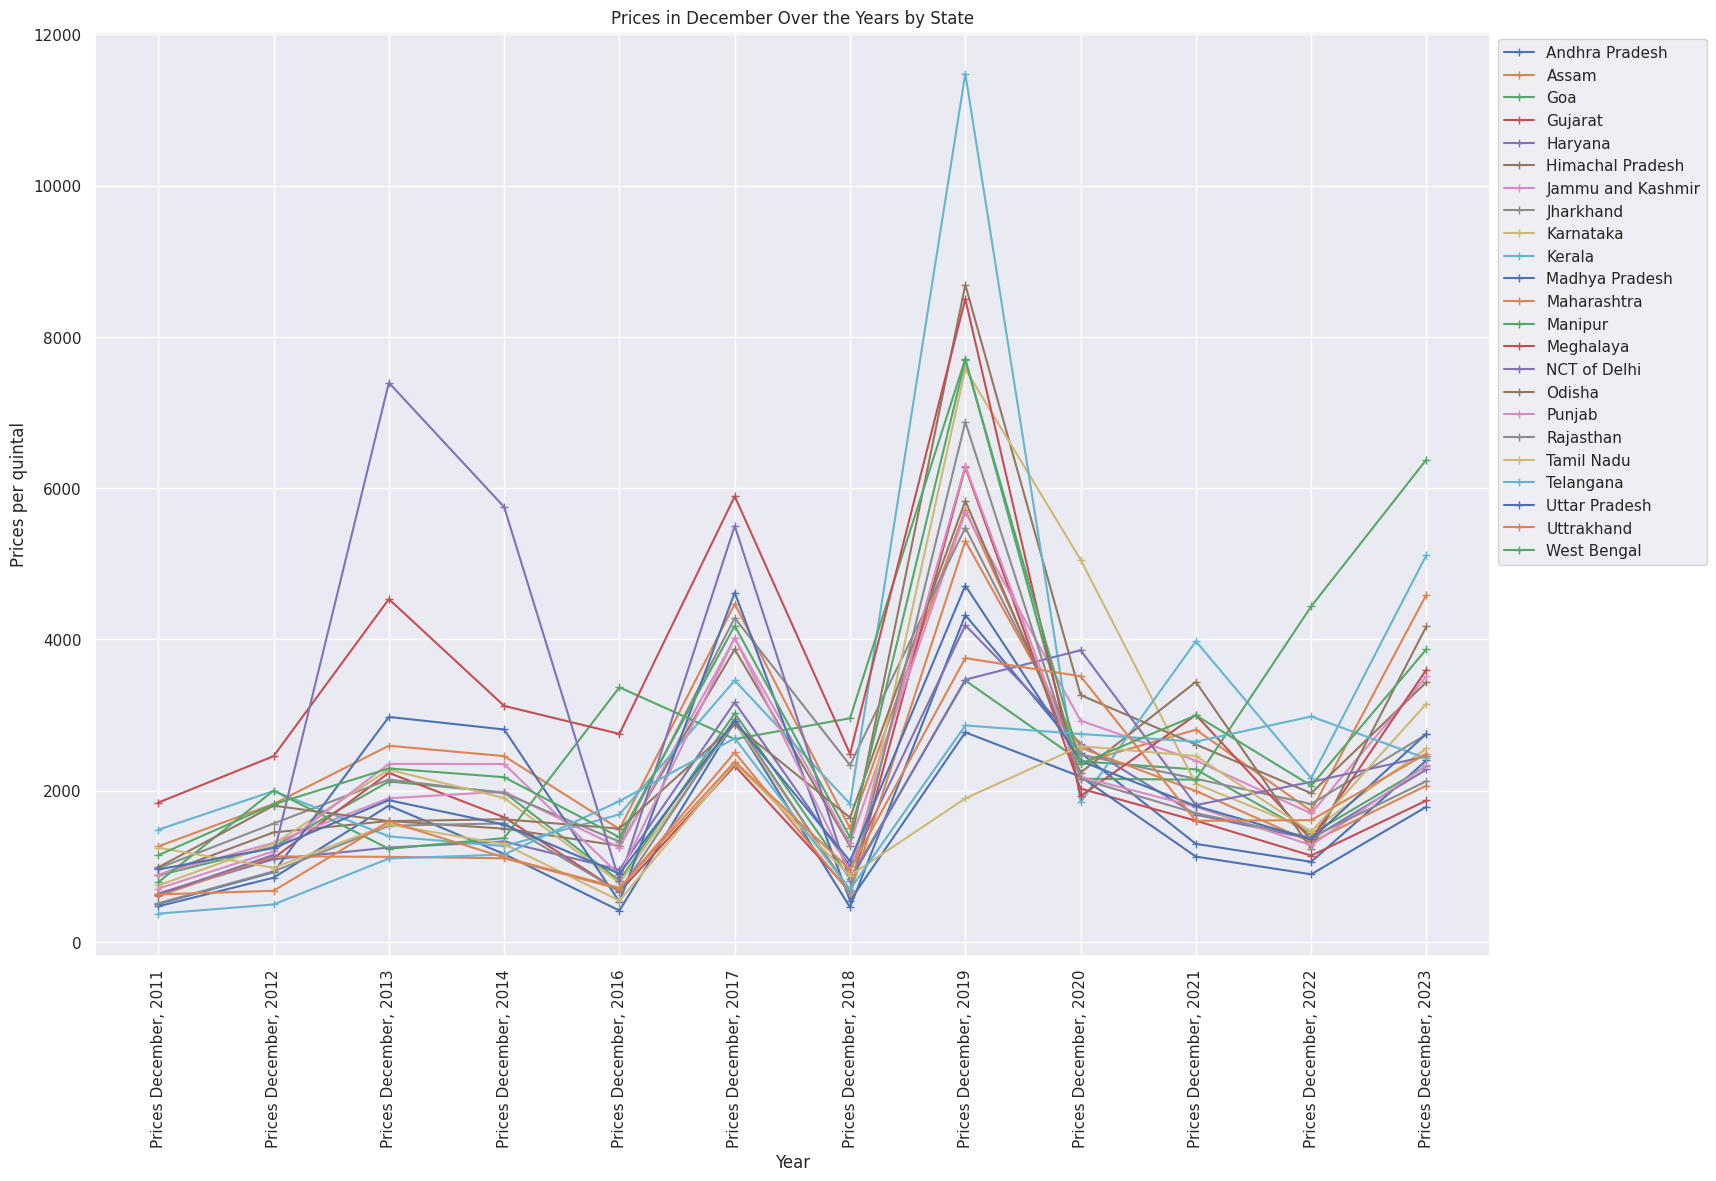

In [81]:
state_column = df_december_['State']
december_columns = [col for col in df_december_.columns if 'December' in col]
december_data = df_december_[december_columns]

# Plotting
plt.figure(figsize=(18, 12))

for index, row in december_data.iterrows():
    plt.plot(row, label=state_column[index], marker='+')

plt.xlabel('Year')
plt.ylabel('Prices per quintal')
plt.title('Prices in December Over the Years by State')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')

plt.show()

**QUESTION:--8  What is the analysis of onion prices from January 2023 to January 2024, and what is the trend of prices on a monthly basis during this period?**

**feature engineering**

In [82]:
df_dropped = wholesale_price.iloc[:, -13:]
# columns_to_drop = ['Year', 'Average_Price', 'Year_New']
# df_dropped = last_13_columns_data.drop(columns=columns_to_drop, axis=1)
df_dropped                                                                       #Extract 2023 to 2024 price dataframe

,"Prices January, 2023","Prices Febraury, 2023","Prices March, 2023","Prices April, 2023","Prices May, 2023","Prices June, 2023","Prices July, 2023","Prices August, 2023","Prices September, 2023","Prices October, 2023","Prices November, 2023","Prices December, 2023","Prices January, 2024"
0,1051,708,622,644,726,1462,1145,2060,1892,2689,3353,2399,1399
1,1567,1432,1098,1400,1864,1989,2413,2134,1263,1689,2353,4593,2109
2,1937,1400,1249,1128,1138,1180,1243,1192,1860,1805,3091,2324,1506
3,1401,932,966,766,895,1074,1344,1707,1776,2667,3295,1869,1442
4,996,1150,965,896,848,981,1418,1623,2726,2178,3070,2279,1733
5,1342,1746,1575,1550,1550,1653,2193,2568,2677,3457,4508,3435,2835
6,2058,1628,1400,1306,1288,1437,1913,2430,2145,3354,4478,3511,2681
7,1969,1001,1018,1123,841,1105,1356,1768,1981,2234,2146,2743,5609
8,1365,2502,2392,907,5348,2994,1154,3492,3673,2848,3353,2558,1730
9,3675,713,674,2504,589,710,3077,1356,1469,4998,6229,5116,3558


In [83]:
state_col = wholesale_price.iloc[:, :1]
df_concat2 = pd.concat([state_col,df_dropped], ignore_index=False,axis=1)
df_concat2                                                                       #join all the column in one Dataframe

,State,"Prices January, 2023","Prices Febraury, 2023","Prices March, 2023","Prices April, 2023","Prices May, 2023","Prices June, 2023","Prices July, 2023","Prices August, 2023","Prices September, 2023","Prices October, 2023","Prices November, 2023","Prices December, 2023","Prices January, 2024"
0,Andhra Pradesh,1051,708,622,644,726,1462,1145,2060,1892,2689,3353,2399,1399
1,Assam,1567,1432,1098,1400,1864,1989,2413,2134,1263,1689,2353,4593,2109
2,Goa,1937,1400,1249,1128,1138,1180,1243,1192,1860,1805,3091,2324,1506
3,Gujarat,1401,932,966,766,895,1074,1344,1707,1776,2667,3295,1869,1442
4,Haryana,996,1150,965,896,848,981,1418,1623,2726,2178,3070,2279,1733
5,Himachal Pradesh,1342,1746,1575,1550,1550,1653,2193,2568,2677,3457,4508,3435,2835
6,Jammu and Kashmir,2058,1628,1400,1306,1288,1437,1913,2430,2145,3354,4478,3511,2681
7,Jharkhand,1969,1001,1018,1123,841,1105,1356,1768,1981,2234,2146,2743,5609
8,Karnataka,1365,2502,2392,907,5348,2994,1154,3492,3673,2848,3353,2558,1730
9,Kerala,3675,713,674,2504,589,710,3077,1356,1469,4998,6229,5116,3558


In [84]:
selected_state=[3,8,11,12,17,20]
selected_dataframe = df_concat2.loc[selected_state, :]
selected_dataframe                                           #Extract Top five onion producing state of India

,State,"Prices January, 2023","Prices Febraury, 2023","Prices March, 2023","Prices April, 2023","Prices May, 2023","Prices June, 2023","Prices July, 2023","Prices August, 2023","Prices September, 2023","Prices October, 2023","Prices November, 2023","Prices December, 2023","Prices January, 2024"
3,Gujarat,1401,932,966,766,895,1074,1344,1707,1776,2667,3295,1869,1442
8,Karnataka,1365,2502,2392,907,5348,2994,1154,3492,3673,2848,3353,2558,1730
11,Maharashtra,1232,3387,2438,618,2209,1145,1212,4024,4590,2788,3351,2067,1669
12,Manipur,3715,2800,2134,2221,2893,1870,4067,1622,3800,4769,7131,6378,4337
17,Rajasthan,1188,1356,1567,723,1234,1123,1013,3587,1474,2037,3039,2125,1433
20,Uttar Pradesh,1386,1383,1223,1213,1141,1085,1478,1730,1989,2219,3670,2752,1943


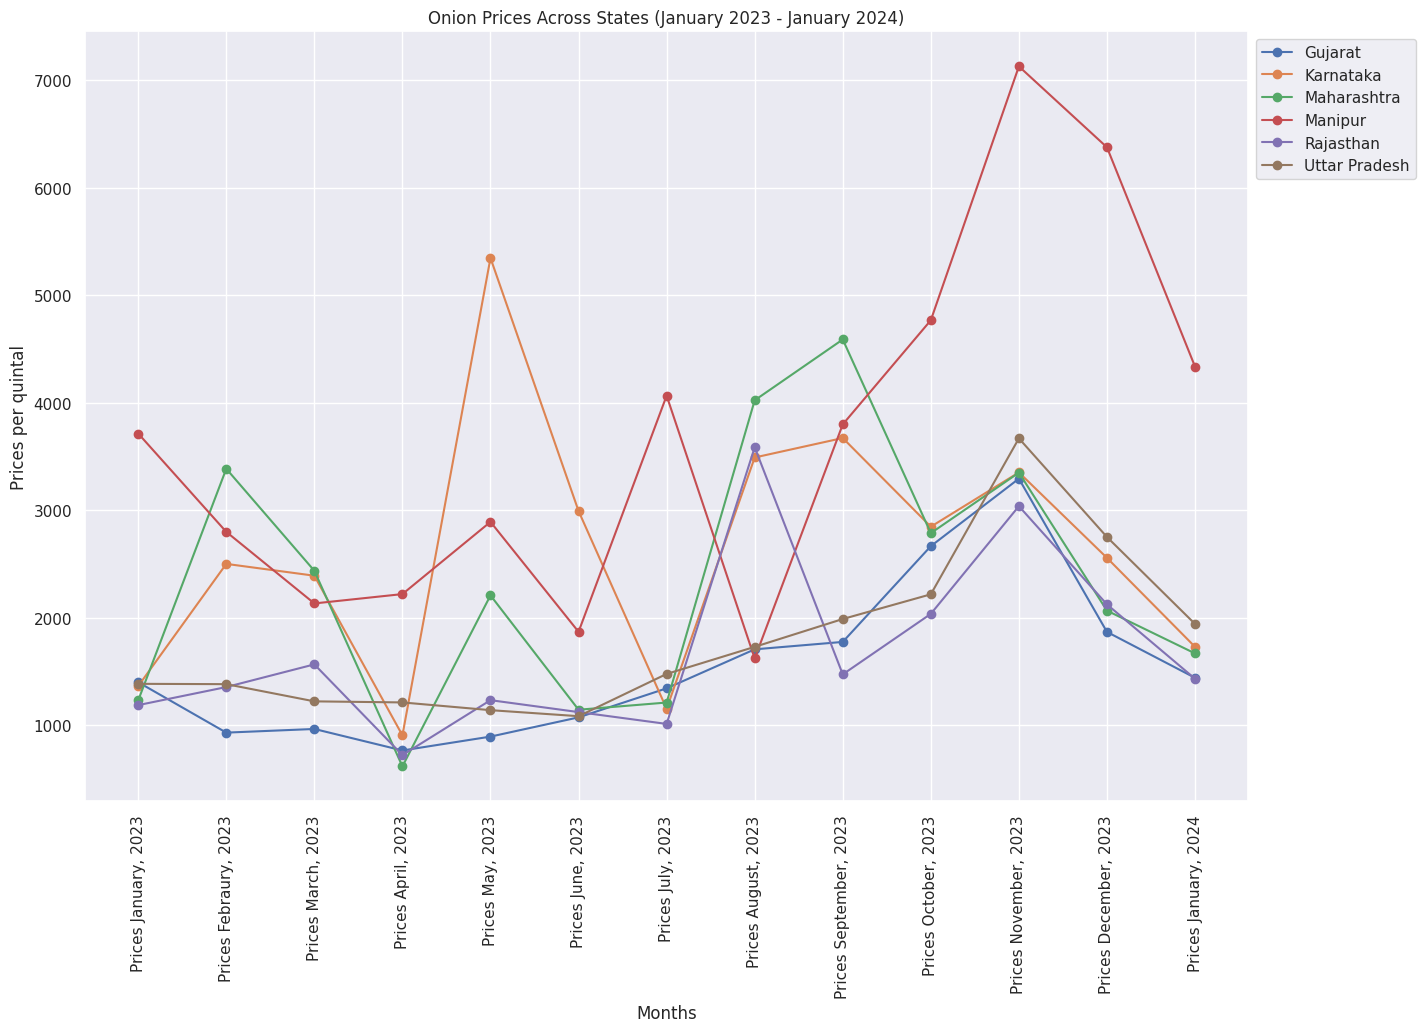

In [85]:
states = selected_dataframe['State']
months = selected_dataframe.columns[1:]  # Extract the State column

plt.figure(figsize=(15, 10))

for index, row in selected_dataframe.iterrows():                                     # Plot each state's prices over the months
    plt.plot(months, row[1:], label=row['State'], marker='o')

plt.xlabel('Months')
plt.ylabel('Prices per quintal')
plt.title('Onion Prices Across States (January 2023 - January 2024)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation='vertical')
plt.grid(True)

plt.show()


### **QUESTION:--9  What will be the predicted prices for the after few months of onion based on the December prices of all states over the last 13 years?**

### **Predict Wholesale price based on 2011 to 2023 by the use of ARIMA Model**

ARIMA, which stands for AutoRegressive Integrated Moving Average, is a time series forecasting model that combines autoregression, differencing, and moving averages. It is widely used for predicting future points in a time series based on its past behavior.

In [86]:
pip install pandas matplotlib statsmodels


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


In [88]:
state_column = df_december_['State']                                                 #Select Dataframe
december_columns = [col for col in df_december_.columns if 'December' in col]        #Extract Pericular Columns
december_data = df_december_.set_index('State')[december_columns].T                  #Set the 'State' column as the index and select only the 'December' columns, then transpose the DataFrame
                                                                                     #Why Transpose??--->Transposing the DataFrame is a common practice in time series analysis when working with data in the form of rows and columns, especially when each row represents a time.
state_to_predict = 'Gujarat'                                                         #Select a particular State which state onion price you will to Predict.
data_to_predict = december_data[state_to_predict]

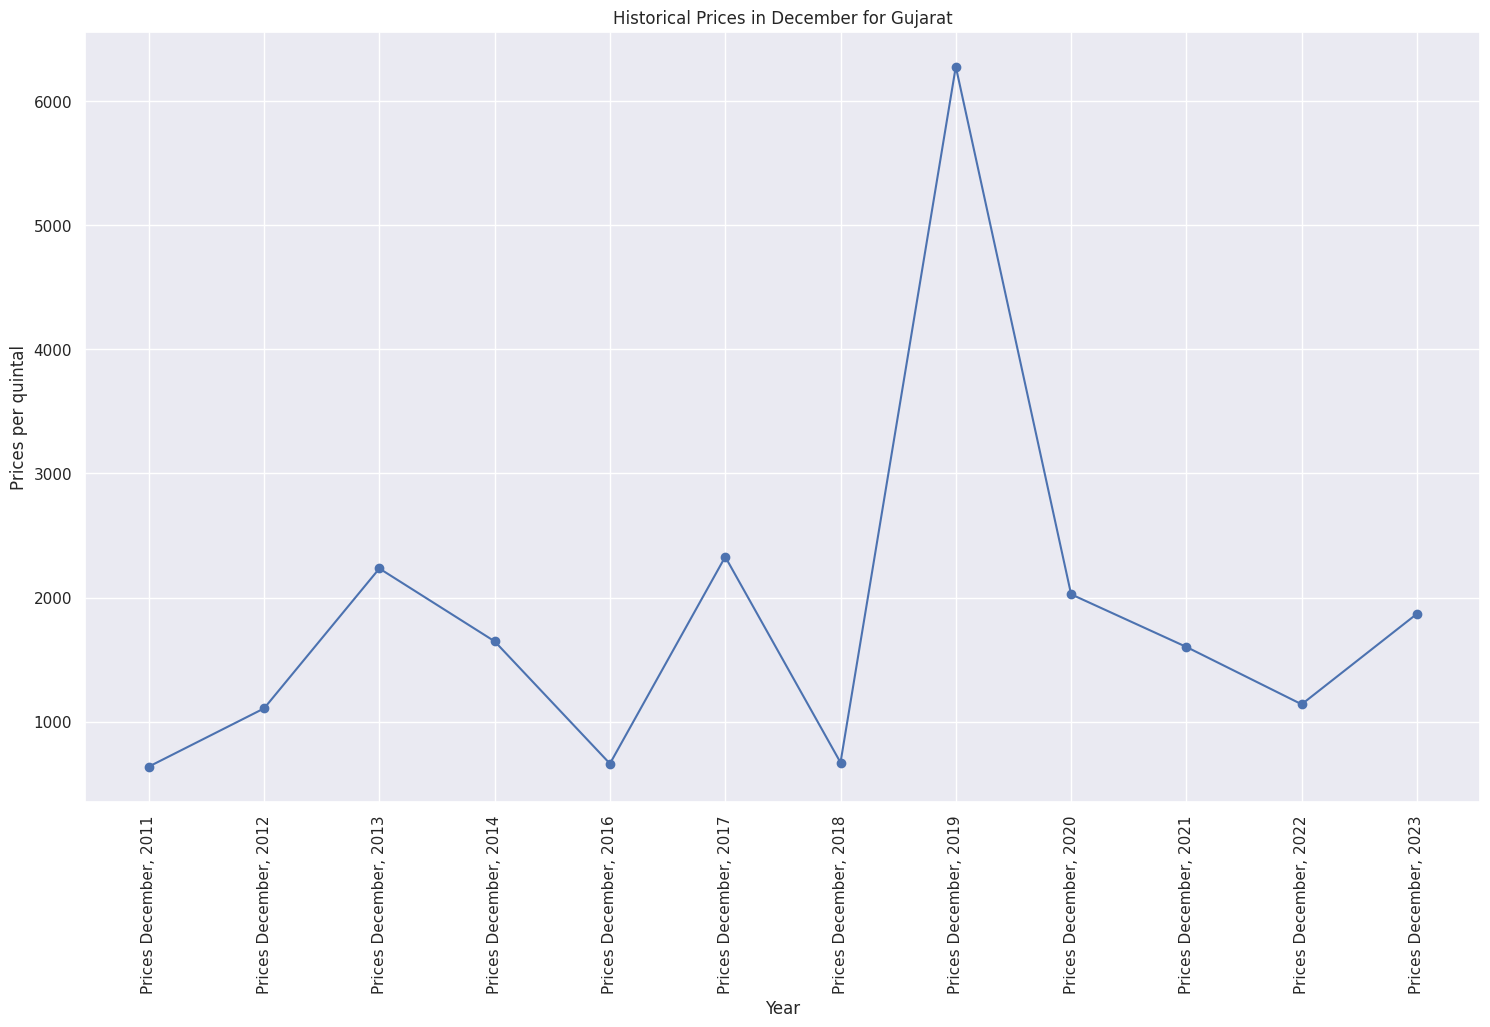

In [89]:
plt.figure(figsize=(18, 10))
plt.plot(data_to_predict, marker='o')                                                 #Use Historical data for ploting a graph
plt.title(f'Historical Prices in December for {state_to_predict}')
plt.xlabel('Year')
plt.ylabel('Prices per quintal')
plt.xticks(rotation='vertical')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results w

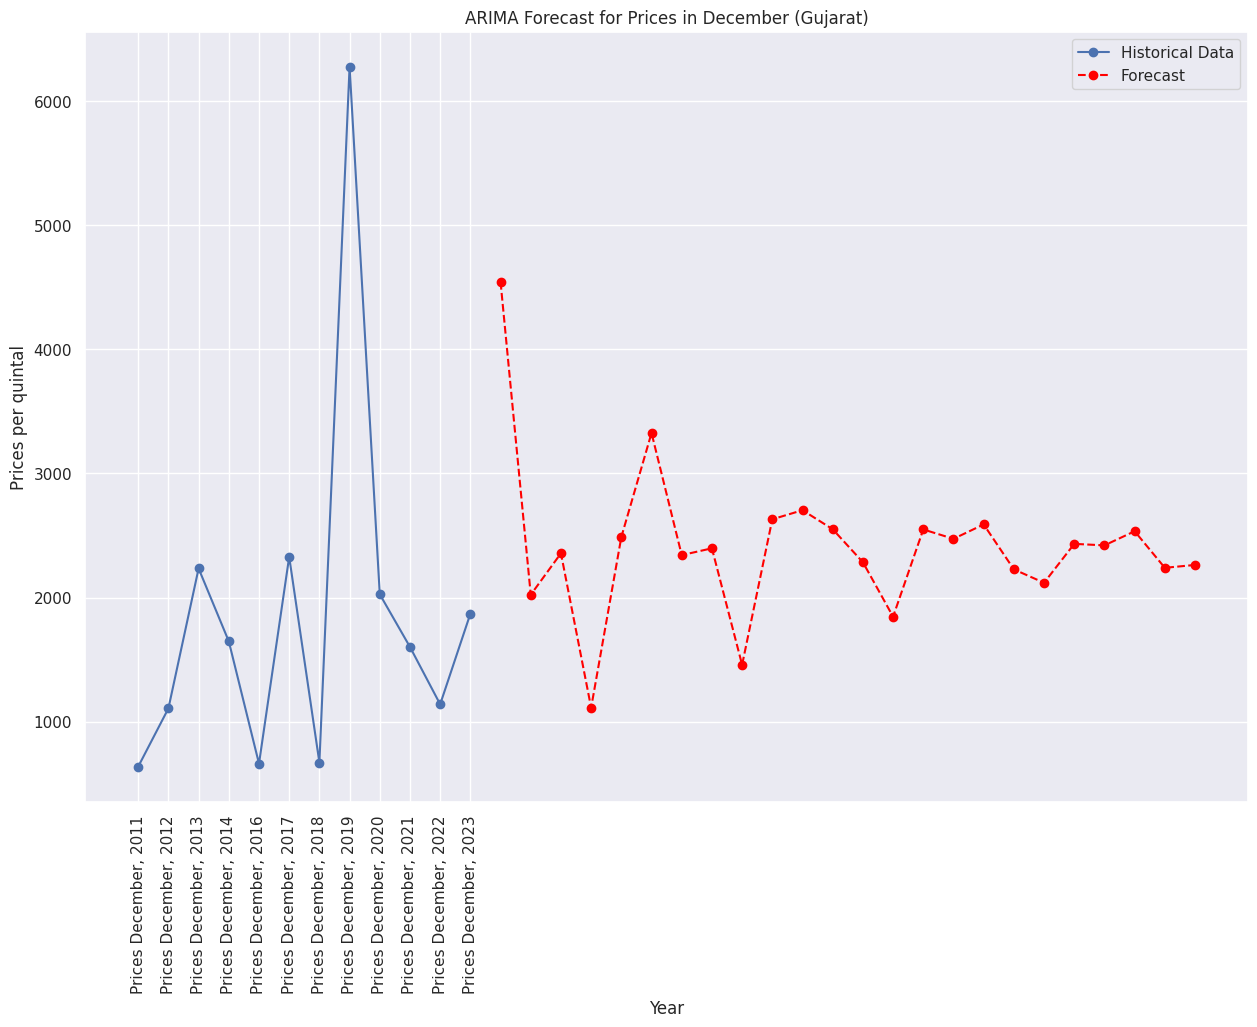

In [90]:
model = ARIMA(data_to_predict, order=(5,1,0))                    #Set ARIMA parameter  p=5, d=1, q=0
results = model.fit()                                            # Fit ARIMA model

# Forecast next year
forecast_steps = 24                                             # Assuming you want to predict the next 24 months
forecast = results.get_forecast(steps=forecast_steps)

plt.figure(figsize=(15, 10))                                     # Plot the forecast
plt.plot(data_to_predict, label='Historical Data', marker='o')
plt.plot(forecast.predicted_mean, label='Forecast', linestyle='--', color='red', marker='o')
plt.title(f'ARIMA Forecast for Prices in December ({state_to_predict})')
plt.xlabel('Year')
plt.ylabel('Prices per quintal')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()


**END**